In [2]:
import pandas as pd

In [3]:
df = pd.read_json('/Users/kachu/Desktop/DS/ultimate_challenge/ultimate_data_challenge.json')

In [4]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [5]:
df_logins = pd.read_json('/Users/kachu/Desktop/DS/ultimate_challenge/logins.json')

In [6]:
df_logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


/var/folders/w5/tybx4nks0jddbytdr2l28jb40000gn/T/ipykernel_11157/724844058.py:14: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  login_counts = df_logins.resample('15T').size()


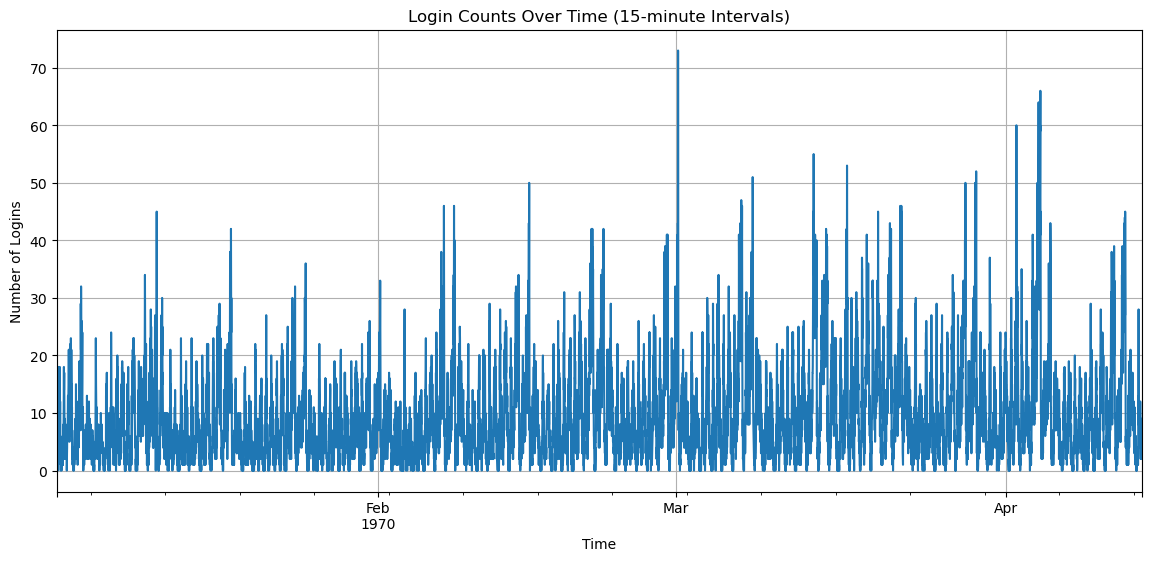

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
df_logins = pd.read_json('/Users/kachu/Desktop/DS/ultimate_challenge/logins.json')

# Convert login_time to datetime format
df_logins['login_time'] = pd.to_datetime(df_logins['login_time'])

# Set login_time as index
df_logins.set_index('login_time', inplace=True)

# Resample data into 15-minute intervals and count logins
login_counts = df_logins.resample('15T').size()

# Plot the time series
plt.figure(figsize=(14, 6))
login_counts.plot()
plt.title('Login Counts Over Time (15-minute Intervals)')
plt.xlabel('Time')
plt.ylabel('Number of Logins')
plt.grid(True)
plt.show()

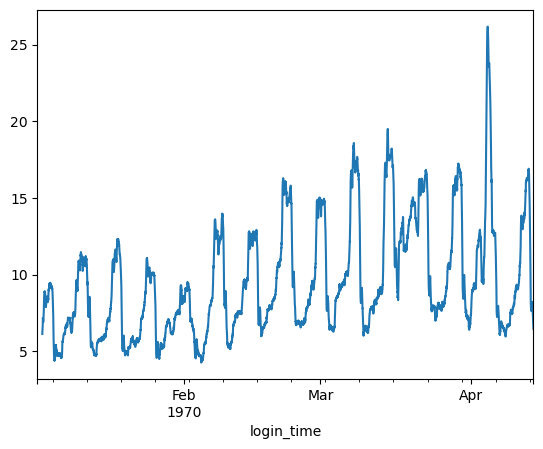

In [19]:
login_counts.rolling(window=96).mean().plot()
plt.show()

In [13]:
login_counts.describe()

count    9788.000000
mean        9.515938
std         8.328818
min         0.000000
25%         3.000000
50%         7.000000
75%        13.000000
max        73.000000
dtype: float64

In [14]:
login_counts.head()

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
Freq: 15min, dtype: int64

Part 2 ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

    Ans: The key measure of success for this experiment could be the increase in the number of trips taken by driver partners between the two cities. This metric directly reflects the effectiveness of the reimbursement policy in encouraging driver partners to serve both cities. By tracking the number of trips across the toll bridge before and after the implementation of the reimbursement policy, we can assess whether it has succeeded in increasing cross-city mobility.

2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

    a) how you will implement the experiment?
    
        To implement the experiment, we would first establish a baseline by recording the number of trips taken between the two cities over a certain period (e.g., one month) without any reimbursement policy in place. Then, we would introduce the reimbursement policy, where all toll costs for driver partners are reimbursed, and continue recording the number of trips over the same period.


    b) what statistical test(s) you will conduct to verify the significance of the observation
    
            To verify the significance of the observation, we can conduct a hypothesis test, specifically a two-sample hypothesis test for proportions. We would compare the proportion of trips taken across the toll bridge before and after the reimbursement policy. The null hypothesis would be that there is no difference in the proportion of trips before and after the policy change. The alternative hypothesis would be that the proportion of trips after the policy change is greater than the proportion before the change.

    c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.
    
        After conducting the statistical test, we would interpret the results based on the p-value obtained. If the p-value is below a predetermined significance level (e.g., 0.05), we would reject the null hypothesis and conclude that there is a significant increase in the proportion of trips after the reimbursement policy. We would then provide recommendations to the city operations team based on this finding.


Note: The two cities of Gotham and Metropolis are not in the provided dataset; however, you do not need this information to answer Part 2.


Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns
import sklearn

In [34]:
display(df.shape)
display(df.info())
display(df.columns)

(50000, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  was_retained            50000 non-null  int64 

None

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'was_retained'],
      dtype='object')

In [22]:
df.last_trip_date[0]

'2014-06-17'

In [31]:
df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)

In [32]:
df['last_trip_date'].describe()

count                            50000
mean     2014-04-19 08:02:04.992000256
min                2014-01-01 00:00:00
25%                2014-02-14 00:00:00
50%                2014-05-08 00:00:00
75%                2014-06-18 00:00:00
max                2014-07-01 00:00:00
Name: last_trip_date, dtype: object

In [25]:
fraction_retained = (df.last_trip_date >= '2014-06-01').sum() / (df.last_trip_date >= '2014-06-01').count()
print("Fraction of Observed Users Retained:", fraction_retained)

Fraction of Observed Users Retained: 0.37608


In [26]:
df['was_retained'] = (df.last_trip_date >= '2014-06-01')*1
df.describe()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,was_retained
count,50000.000000,50000,41878.000000,50000.000000,50000,50000.000000,50000.000000,50000.000000,49799.000000,50000.000000
mean,2.278200,2014-01-16 13:04:20.352000,4.601559,1.074764,2014-04-19 08:02:04.992000256,8.849536,60.926084,5.796827,4.778158,0.376080
min,0.000000,2014-01-01 00:00:00,1.000000,1.000000,2014-01-01 00:00:00,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,2014-01-09 00:00:00,4.300000,1.000000,2014-02-14 00:00:00,0.000000,33.300000,2.420000,4.700000,0.000000
50%,1.000000,2014-01-17 00:00:00,4.900000,1.000000,2014-05-08 00:00:00,0.000000,66.700000,3.880000,5.000000,0.000000
75%,3.000000,2014-01-24 00:00:00,5.000000,1.050000,2014-06-18 00:00:00,8.600000,100.000000,6.940000,5.000000,1.000000
max,125.000000,2014-01-31 00:00:00,5.000000,8.000000,2014-07-01 00:00:00,100.000000,100.000000,160.960000,5.000000,1.000000
std,3.792684,NaN,0.617338,0.222336,NaN,19.958811,37.081503,5.707357,0.446652,0.484405


In [29]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,was_retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  was_retained            50000 non-null  int64 

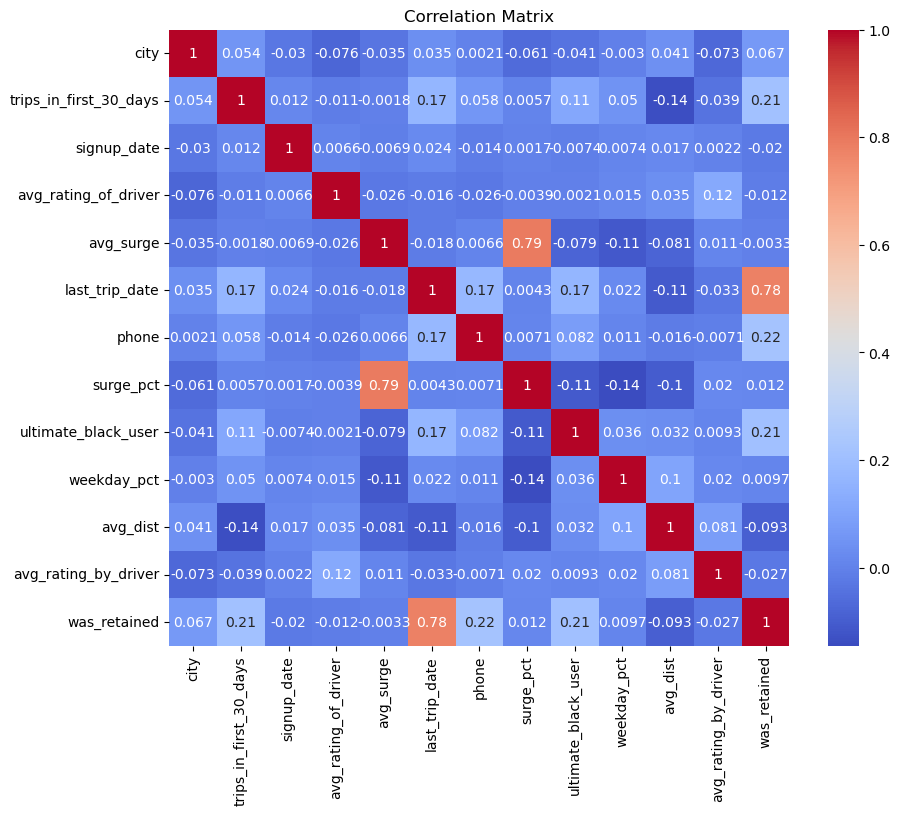

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame containing the data

# Encoding categorical variables
encoder = LabelEncoder()
df['city'] = encoder.fit_transform(df['city'])
df['phone'] = encoder.fit_transform(df['phone'])

# Plotting correlation matrix
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111)
corr = df.corr()
ax = sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Matrix')
plt.show()

In [41]:
df.tail()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,was_retained
49995,1,0,2014-01-25,5.0,1.0,2014-06-05,1,0.0,False,100.0,5.63,4.2,1
49996,0,1,2014-01-24,NaN,1.0,2014-01-25,1,0.0,False,0.0,0.00,4.0,0
49997,2,0,2014-01-31,5.0,1.0,2014-05-22,0,0.0,True,100.0,3.86,5.0,0
49998,0,2,2014-01-14,3.0,1.0,2014-01-15,1,0.0,False,100.0,4.58,3.5,0
49999,0,0,2014-01-18,NaN,1.0,2014-04-20,0,0.0,False,0.0,3.49,5.0,0


In [42]:
corr['was_retained'].sort_values(ascending=False)

was_retained              1.000000
last_trip_date            0.780837
phone                     0.217594
trips_in_first_30_days    0.210463
ultimate_black_user       0.205002
city                      0.066755
surge_pct                 0.011797
weekday_pct               0.009693
avg_surge                -0.003333
avg_rating_of_driver     -0.011653
signup_date              -0.020211
avg_rating_by_driver     -0.026791
avg_dist                 -0.092780
Name: was_retained, dtype: float64

In [44]:
df['last_trip_date'].corr(df['was_retained'])
#last trip date is correlated with retention

0.7808374961937314